In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
# path to images
path = 'human/'

# human categories
categories = ['WithMask','WithoutMask'] 

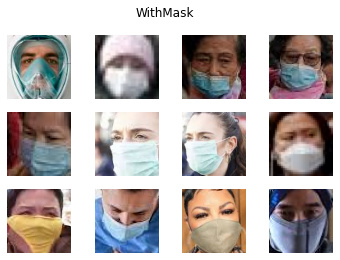

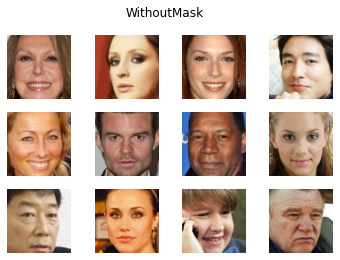

In [6]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [7]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

WithMask  => height min :  25 width min :  25
WithMask  => height max :  563 width max :  563
WithoutMask  => height min :  26 width min :  26
WithoutMask  => height max :  156 width max :  156


In [8]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 25
WIDTH = 25
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'WithMask', k=1 : 'WithoutMask'

print(imagePaths[:10])
import random
random.shuffle(imagePaths)
print(imagePaths[:10])


[['human/WithMask/10.png', 0], ['human/WithMask/100.png', 0], ['human/WithMask/1004.png', 0], ['human/WithMask/1005.png', 0], ['human/WithMask/1006.png', 0], ['human/WithMask/1007.png', 0], ['human/WithMask/1008.png', 0], ['human/WithMask/1011.png', 0], ['human/WithMask/1012.png', 0], ['human/WithMask/1018.png', 0]]
[['human/WithMask/Augmented_240_1012613.png', 0], ['human/WithoutMask/2439.png', 1], ['human/WithoutMask/2598.png', 1], ['human/WithoutMask/2225.png', 1], ['human/WithMask/Augmented_381_7759569.png', 0], ['human/WithoutMask/5776.png', 1], ['human/WithoutMask/2817.png', 1], ['human/WithoutMask/3442.png', 1], ['human/WithoutMask/1232.png', 1], ['human/WithoutMask/2983.png', 1]]


In [9]:

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
    resized = cv2.resize(gray, (WIDTH, HEIGHT))  # .flatten()
    data.append(resized)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

In [10]:
data[0]


array([[218, 218, 222, 223, 198, 109, 121, 100, 111, 141, 145, 151, 159,
        174, 200, 205, 209, 218, 143, 194, 228, 228, 231, 231, 231],
       [218, 218, 220, 220, 146, 106,  72, 117, 135, 141, 148, 155, 165,
        176, 196, 207, 212, 222, 225, 148, 215, 229, 231, 231, 231],
       [218, 218, 220, 220, 109, 115, 122, 139, 139, 148, 157, 160, 170,
        183, 197, 211, 215, 230, 231, 214, 199, 226, 229, 229, 229],
       [218, 218, 219, 197,  93,  85, 136, 140, 145, 149, 157, 162, 171,
        187, 202, 211, 223, 236, 239, 237, 197, 222, 229, 229, 229],
       [218, 218, 218, 147, 104, 103, 136, 140, 144, 149, 156, 164, 172,
        189, 206, 209, 227, 237, 241, 240, 181, 199, 229, 229, 229],
       [218, 218, 222, 132,  93, 129, 135, 148, 154, 158, 163, 175, 188,
        193, 194, 211, 225, 234, 238, 237, 204, 198, 230, 229, 229],
       [218, 218, 220, 158,  91, 138, 134, 123, 114, 130, 149, 183, 180,
        185, 196, 208, 221, 226, 237, 244, 218, 202, 229, 229, 229],
      

In [11]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0 
data=np.reshape(data,(data.shape[0],WIDTH,HEIGHT,1)) # independent features
labels = np.array(labels)     # dependent features



In [12]:
data[0]
data.shape[1:]

(25, 25, 1)

In [13]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)
# Preprocess class labels
print(trainY)
trainY = np_utils.to_categorical(trainY, 2)  # actual y 

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)
trainY


[1 0 1 ... 0 0 0]
(7996, 25, 25, 1)
(1999, 25, 25, 1)
(7996, 2)
(1999,)


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [14]:
model = Sequential()

model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(25,25,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   # max value access from 2,2 matrix
model.add(Dropout(0.25))
model.add(Flatten()) # to convert array of image  into 1D
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [15]:
model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
250/250 [==============================] - 4s 16ms/step - loss: 0.4175 - accuracy: 0.7956
Epoch 2/25
250/250 [==============================] - 4s 16ms/step - loss: 0.1653 - accuracy: 0.9397
Epoch 3/25
250/250 [==============================] - 4s 16ms/step - loss: 0.1312 - accuracy: 0.9532
Epoch 4/25
250/250 [==============================] - 4s 16ms/step - loss: 0.1032 - accuracy: 0.9642
Epoch 5/25
250/250 [==============================] - 4s 16ms/step - loss: 0.0987 - accuracy: 0.9651
Epoch 6/25
250/250 [==============================] - 4s 16ms/step - loss: 0.0924 - accuracy: 0.9680
Epoch 7/25
250/250 [==============================] - 4s 16ms/step - loss: 0.0853 - accuracy: 0.9701
Epoch 8/25
250/250 [==============================] - 4s 15ms/step - loss: 0.0747 - accuracy: 0.9722
Epoch 9/25
250/250 [==============================] - 4s 15ms/step - loss: 0.0732 - accuracy: 0.9747
Epoch 10/25
250/250 [==============================] - 4s 15ms/step - loss: 0.0641 - accura

<ipython-input-16-59b38f3eb581>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories)
<ipython-input-16-59b38f3eb581>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


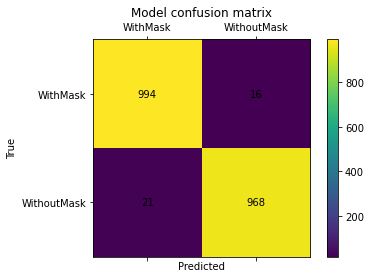

Accuracy : 98.15%


In [16]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(2):
    for j in range(2):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [17]:
model.save('mask.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: mask.model\assets
